In [1]:
import pandas as pd
import numpy as np

# For data visualization 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Importing Datasets 

In [2]:
#120OlympicHistory_AthletesResults

athlete_events = pd.read_csv('../Datasets/120OlympicHistory_AthletesResults_dataset/athlete_events.csv')
regions = pd.read_csv('../Datasets/120OlympicHistory_AthletesResults_dataset/noc_regions.csv')


# 2. Data Exploration - 120 Olympic History

2.1 Exploring athlete_events dataset

In [3]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


2.2 Exploring regions dataset


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# 3.  Data Cleaning

3.1 Check for null values

In [6]:
print(athlete_events.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


Null Values found in Age, Height, Weight and Medals

In [7]:
# Replacing Null VAlues in Medal by No Medal

athlete_events['Medal'].fillna('No Medal', inplace = True)
#print(athlete_events.isnull().sum())

# 4. Merging  athlete_events and regions datasets


3.1 Merging dataset to get a combined set of athlete events and regions.
Complete dataset name "olympics_dataset"

In [8]:
olympics_dataset = pd.merge(athlete_events, regions, on = "NOC", how = "left")
olympics_dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NaN


3.2 Exploring complete dataset

In [9]:
print(f'Total number of athletes in Olympics: {len(olympics_dataset["ID"].unique())}')
print(f'Years:{olympics_dataset["Year"].unique()}')

Total number of athletes in Olympics: 135571
Years:[1992 2012 1920 1900 1988 1994 1932 2002 1952 1980 2000 1996 1912 1924
 2014 1948 1998 2006 2008 2016 2004 1960 1964 1984 1968 1972 1936 1956
 1928 1976 2010 1906 1904 1908 1896]


# Subset data for Russia / Former Soviet States & Soviet Union 

In [10]:
# Participation
subset_df = olympics_dataset.loc[((olympics_dataset['NOC'] == 'URS')|(olympics_dataset['NOC'] == 'RUS')) 
                                 & (olympics_dataset['Year'] >= 1966) & (olympics_dataset['Year'] <= 2014)]

In [40]:
data_country_year = subset_df.groupby(['Year','NOC'])['Medal'].count()
data_country_year_df =pd.DataFrame({"data_country_year ": data_country_year})
data_country_year_df.index.name = None
data_country_year_df.sort_values("Year",ascending = True)

,,data_country_year
Year,NOC,
1968,URS,592
1972,URS,649
1976,URS,695
1980,URS,789
1984,URS,143
1988,URS,799
1994,RUS,208
1996,RUS,552
1998,RUS,197


Text(0.5, 1.0, 'Medals Won : Russia & Soviet Union (1996-2017)')

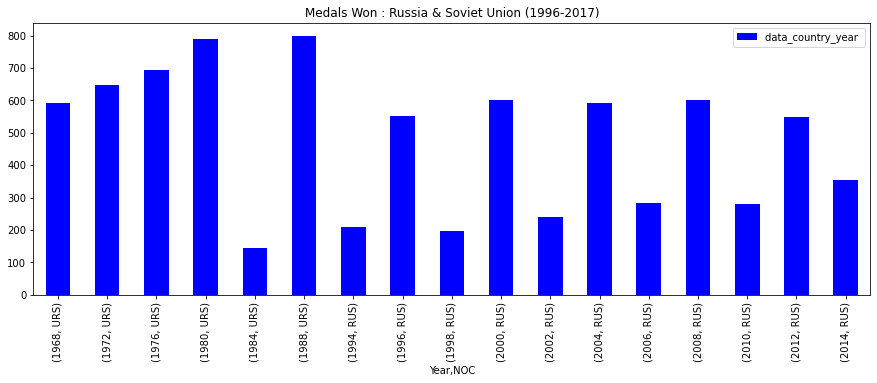

In [41]:
#plot
data_country_year_df.plot.bar(facecolor='blue', figsize=(15,5))
plt.title("Medals Won : Russia & Soviet Union (1996-2017)")

In [13]:
data_team_region_year = subset_df.groupby(['Year','NOC','Team'])['Medal'].count()
data_team_region_year_df =pd.DataFrame({"data_team_region_year ": data_team_region_year})
data_team_region_year_df.index.name = None
data_team_region_year_df.sort_values("Year",ascending = True)

data_team_region_year 
Year NOC Team                                  
1968 URS Soviet Union                       586
         Soviet Union-1                       2
         Soviet Union-2                       2
         Soviet Union-3                       2
1972 URS Soviet Union                       639
         Soviet Union-1                       4
         Soviet Union-2                       4
         Soviet Union-3                       2
1976 URS Soviet Union                       679
         Soviet Union-1                       6
         Soviet Union-2                       6
         Soviet Union-3                       4
1980 URS Soviet Union-2                       6
         Soviet Union-3                       4
         Soviet Union                       773
         Soviet Union-1                       6
1984 URS Soviet Union                       115
         Soviet Union-1                      12
         Soviet Union-2                      12
         Soviet Union-3                       4
1988 URS Soviet Union-3                       4
         Soviet Union-2                      12
         Soviet Union                       771
         Soviet Union-1                      12
1994 RUS Russia                             188
         Russia-1                             8
         Russia-2                             8
         Russia-3                             4
1996 RUS Russia                             552
1998 RUS Russia-3                             4
         Russia-2                             8
         Russia                             177
         Russia-1                             8
2000 RUS Russia                             602
2002 RUS Russia                             214
         Russia-1                            12
         Russia-2                            12
         Russia-3                             2
2004 RUS Russia                             581
         Russia-1                             6
         Russia-2                             6
2006 RUS Russia-2                            12
         Russia                             255
         Russia-1                            12
         Russia-3                             4
2008 RUS Russia-2                             4
         Russia                             592
         Russia-1                             4
2010 RUS Russia                             243
         Russia-1                            14
         Russia-2                            14
         Russia-3                             8
2012 RUS Russia-2                             4
         Russia                             541
         Russia-1                             4
2014 RUS Russia-1                            14
         Russia-2                            14
         Russia                             317
         Russia-3                             8

# Medal Analysis

In [45]:
#subset_df
medal_df = subset_df[['NOC','Year','Season','Event','Medal','Sport']]

#Summary Analysis
#medal_count = medal_df.groupby([ 'NOC', 'Year'])\.aggregate({'Gold': 'sum', 'Silver': 'sum', 'Bronze': 'sum'}).reset_index()
#medal_count

In [46]:
medals_noc_subset_df = subset_df.groupby(['NOC','Year'])['Medal'].count().reset_index()
# USSR DataSet
ussr_1966_1991_df = medals_noc_subset_df.loc[(medals_noc_subset_df['NOC'] == 'URS' ) & (medals_noc_subset_df['Year'] >= 1966)
                                      & (medals_noc_subset_df['Year'] <= 1991)]
# Russia DataSet
russia_1922_2014_df = medals_noc_subset_df.loc[(medals_noc_subset_df['NOC'] == 'RUS' ) & (medals_noc_subset_df['Year'] >= 1992)
                                      & (medals_noc_subset_df['Year'] <= 2014)]

min_year = min()


,NOC,Year,Medal
0,RUS,1994,208
1,RUS,1996,552
2,RUS,1998,197
3,RUS,2000,602
4,RUS,2002,240
5,RUS,2004,593
6,RUS,2006,283
7,RUS,2008,600
8,RUS,2010,279
9,RUS,2012,549
